# Praca domowa 6

## Zadanie 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [ ]:
pd.set_option("display.max.columns", None)
df.head()
med = df['condition'].median()
df_1 = df.loc[(df["waterfront"] == 1) & (df["condition"] >= med)]
df_1['price'].mean()




1662563.9254658385

Odp: 1662563.9254658385$


2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [ ]:
df1 = df.loc[(df["floors"] == 2)]
a = df1["bathrooms"].median()
df2 = df.loc[(df["floors"] == 3)]
b = df2["bathrooms"].median()
a,b

(2.5, 2.5)

Odp: Nie, mediana liczby łazienek jest taka sama w obu przypadkach.


3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [ ]:
df.head()
df3 = df.loc[(df["lat"] > (df['lat'].min()+df['lat'].max())/2)]
df_woda = df3.loc[(df3["waterfront"] == 1)]
df_brak = df3.loc[(df3["waterfront"] == 0)]
q1_woda = df_woda["grade"].quantile(.25)
q3_woda = df_woda["grade"].quantile(.75)
q1_brak = df_brak["grade"].quantile(.25)
q3_brak = df_brak["grade"].quantile(.75)
q1_woda,q3_woda
q1_brak,q3_brak





(7.0, 8.0)

Odp: Jeżeli ma widok na wode, to kwartyl 0.25 to 8, kwartyl 0.75 to 10.
Dla bez widoku na wode, kwartyl 0.25 to 7, kwartyl 0.75 to 8.

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [ ]:
df.groupby(['zipcode'])['zipcode'].size().nlargest(1)
df1 = df.loc[(df["zipcode"] == 98103)]
q1 = df1["price"].quantile(0.25)
q3 = df1["price"].quantile(0.75)
IQR = q3 - q1
IQR


262875.0

Odp: Najwięcej nieruchomości jest pod adresem 98103. Rozstep międzykwartylowy to 262875.0

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [ ]:
n = df.shape[0]
df1 = df.loc[(df["sqft_lot15"] > df["sqft_lot"])]
k = df1.shape[0]
100*k/n


39.51325591079443

Odp: 39.5% brałem pod uwagę powierzchnię całej nieruchomości.

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [ ]:
df1 = df.loc[(df["lat"] > (df['lat'].min()+df['lat'].max())/2) & (df["long"] < (df['long'].min()+df['long'].max())/2)]
n1 = df1.shape[0]
df2 = df.loc[(df["lat"] < (df['lat'].min()+df['lat'].max())/2) & (df["long"] > (df['long'].min()+df['long'].max())/2)]
n2 = df2.shape[0]
100*(n1-n2)/n2


18343.529411764706

Odp: 18343.529411764706 %.

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

Text(0.5, 1.0, 'Ilość domów blisko oraz dalej od wody')

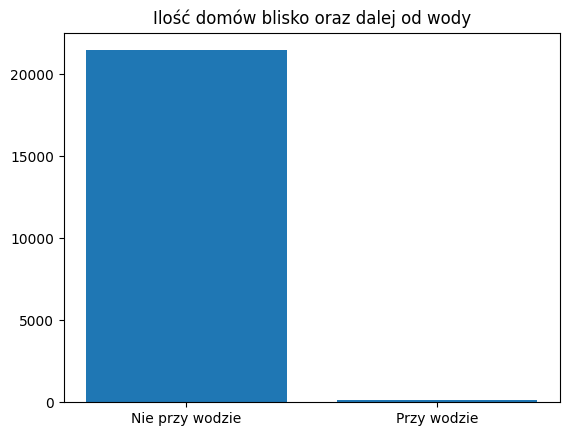

In [ ]:
df1 = df.groupby(['waterfront'])['waterfront'].count().reset_index(name="count")
x = ['Nie przy wodzie','Przy wodzie']
plt.bar(x, 'count',data = df1)
plt.title("Ilość domów blisko oraz dalej od wody")

b)

Text(0.5, 1.0, 'Rozkład metrażu powierzchni mieszkalnej')

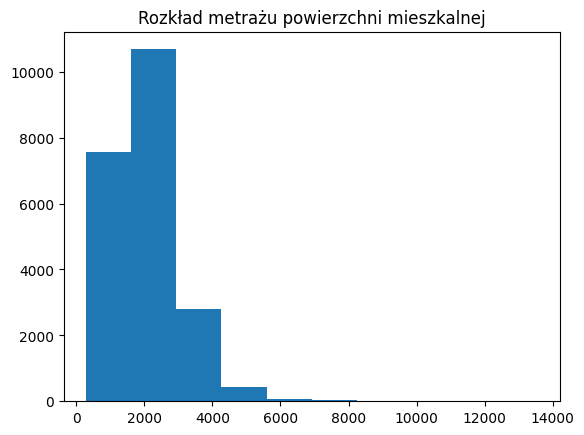

In [ ]:
plt.hist(df["sqft_living"])
plt.title("Rozkład metrażu powierzchni mieszkalnej")

c)

Text(0.5, 1.0, 'Srednia cena mieszkań wybudowanych w danym roku')

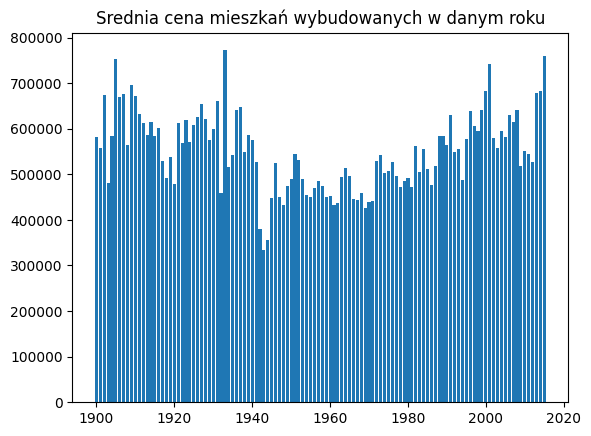

In [ ]:
df1 = df.groupby(['yr_built'])['price'].mean().reset_index(name="srednia")
plt.bar("yr_built","srednia",data = df1)
plt.title("Srednia cena mieszkań wybudowanych w danym roku")